In [268]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np

T = 2**15
eta1 = 0.01
eta = eta1
x0 = 0

grad = np.random.uniform(size=T)*2-1
Hbar = np.sum(grad**2)

x = x0
Q = 0
Rew = 0
X = []
Q_t = [0]
for t in range(T):
    X.append(x)
    g = grad[t]
    Q += x*g
    if Q < eta*Hbar:
        x += eta*g
    else:
        eta *= 2
        Q = 0
        x = x0 + eta*x
    Q_t.append(Q_t[-1]+x*g)
  
G = abs(np.sum(grad))
k = 1/4*eta1*Hbar
a = np.log(2)/3**0.5
gamma = a/Hbar**0.5
eps = eta1*Hbar
bound_reward = k*np.exp(G*gamma)-eps
R = 10
x_knot = R+x0 if np.sum(grad)>0 else x0 - R
bound_regret = R/gamma*(np.log(R/k/gamma)-1)+eps if R>0 else eps
best_reward = x_knot * np.sum(grad)
regret = best_reward-Q_t
budget = Q_t-(1+0.01)*best_reward

In [269]:
Q_t[-1]

172.60297979255228

<IPython.core.display.Javascript object>


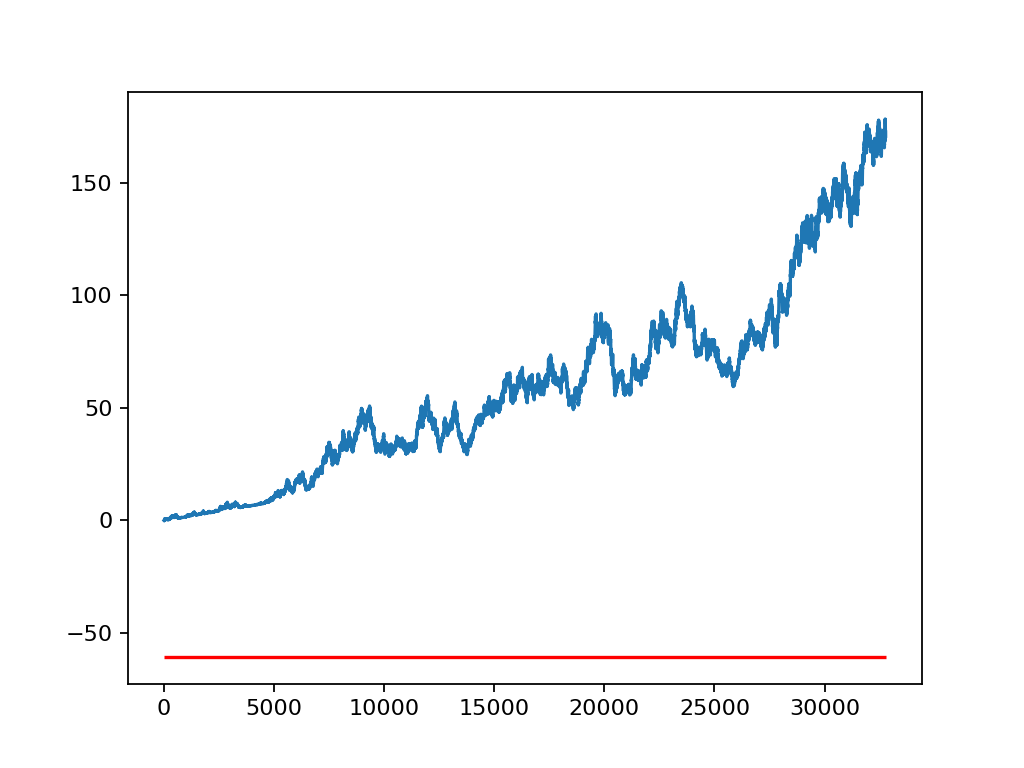

In [270]:
plt.figure()
plt.plot(Q_t)
plt.hlines(bound_reward, 0, T, 'r')
plt.show()

<IPython.core.display.Javascript object>


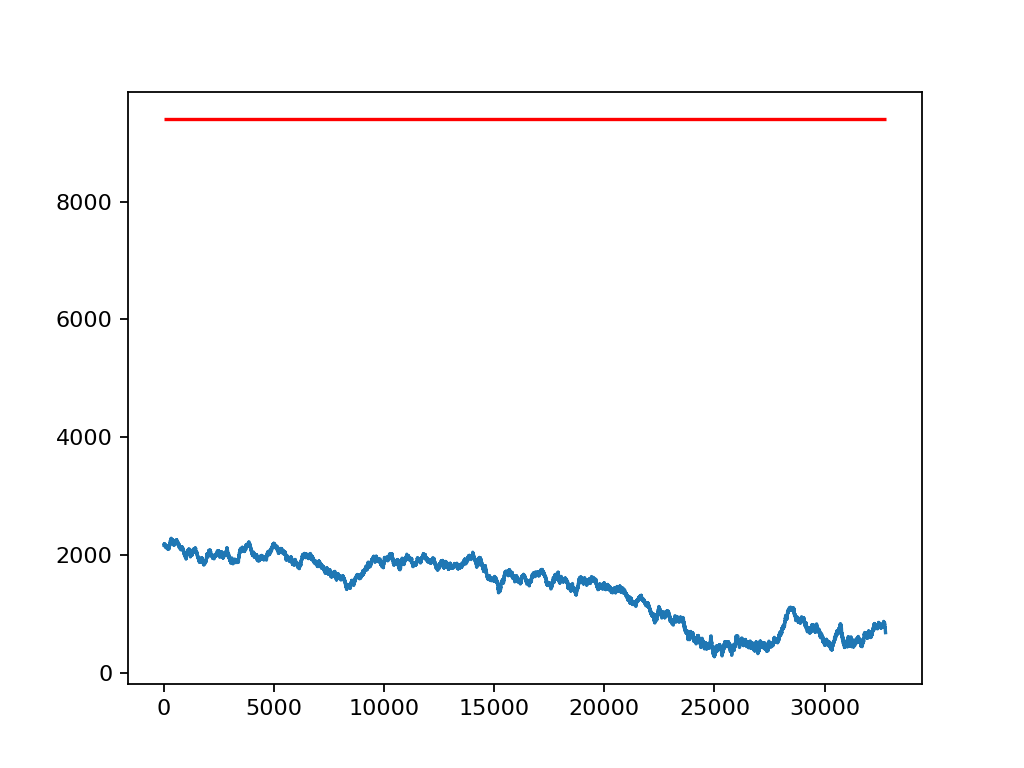

In [233]:
plt.figure()
plt.plot(regret)
plt.hlines(bound_regret, 0, T, 'r')
plt.show()

<IPython.core.display.Javascript object>


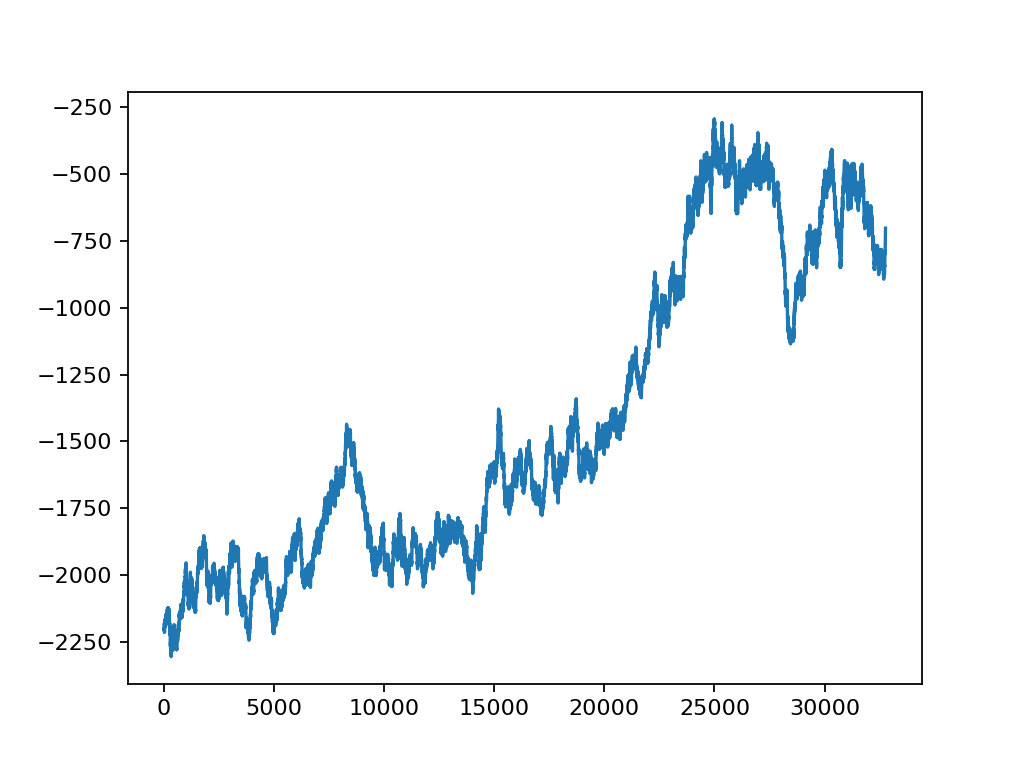

In [234]:
plt.figure()
plt.plot(budget)
plt.show()